In [2]:
#importing libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [4]:
#loading dataset

In [5]:
data=pd.read_csv(r"C:\Users\JUSTIN\Downloads\TCS iON internship\salarydata.csv")

In [6]:
#analysing the data

In [7]:
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
data.tail()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
age               32561 non-null int64
workclass         32561 non-null object
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
salary            32561 non-null object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [11]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [12]:
data.shape

(32561, 14)

# Data cleaning

In [15]:
data.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [16]:
data.isin(['?']).sum(axis=0)

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [17]:
data=pd.DataFrame(data)

In [18]:
#replacing special character(?) values with nan

In [19]:
data['native-country'] = data['native-country'].replace('?',np.nan)
data['workclass'] = data['workclass'].replace('?',np.nan)
data['occupation'] = data['occupation'].replace('?',np.nan)

In [20]:
#droping nan rows

In [21]:
data.dropna(how='any',inplace=True)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 14 columns):
age               30162 non-null int64
workclass         30162 non-null object
education         30162 non-null object
education-num     30162 non-null int64
marital-status    30162 non-null object
occupation        30162 non-null object
relationship      30162 non-null object
race              30162 non-null object
sex               30162 non-null object
capital-gain      30162 non-null int64
capital-loss      30162 non-null int64
hours-per-week    30162 non-null int64
native-country    30162 non-null object
salary            30162 non-null object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


# Label encoding

In [23]:
from sklearn import preprocessing 
label= preprocessing.LabelEncoder()  
data['workclass']=label.fit_transform(data['workclass'])
data['education']=label.fit_transform(data['education'])
data['occupation']=label.fit_transform(data['occupation'])
data['sex']=label.fit_transform(data['sex'])
data['salary']=label.fit_transform(data['salary'])
data['race']=label.fit_transform(data['race'])
data['native-country']=label.fit_transform(data['native-country'])
data['marital-status']=label.fit_transform(data['marital-status'])
data['relationship']=label.fit_transform(data['relationship'])

In [24]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


# Finding outliers

Text(0.5, 1.0, 'Box plot of education num')

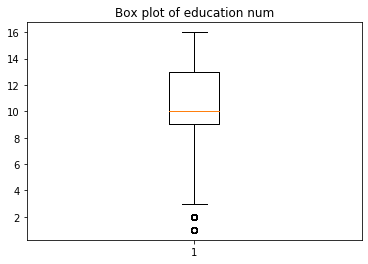

In [25]:
plt.boxplot(data['education-num'])
plt.title("Box plot of education num")

Text(0.5, 1.0, 'Box plot of age')

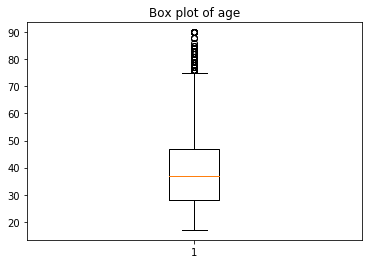

In [26]:
plt.boxplot(data['age'])
plt.title("Box plot of age")

In [27]:
q1=np.percentile(data['age'],25,interpolation='midpoint')
q2=np.percentile(data['age'],50,interpolation='midpoint')
q3=np.percentile(data['age'],75,interpolation='midpoint')
print(q1)
print(q2)
print(q3)

28.0
37.0
47.0


In [28]:
iqr=q3-q1
l_lim=q1-1.5*iqr
u_lim=q3+1.5*iqr
print(l_lim)
print(u_lim)

-0.5
75.5


In [29]:
outlier=[]
for x in data['age']:
 if((x>u_lim)or(x<l_lim)):
        outlier.append(x)
outlier

[79,
 76,
 90,
 77,
 76,
 81,
 78,
 90,
 88,
 90,
 77,
 90,
 77,
 78,
 80,
 90,
 81,
 81,
 76,
 80,
 90,
 76,
 79,
 76,
 81,
 76,
 90,
 90,
 80,
 90,
 90,
 79,
 78,
 79,
 84,
 90,
 77,
 80,
 77,
 90,
 81,
 83,
 84,
 79,
 76,
 85,
 82,
 79,
 77,
 90,
 76,
 90,
 84,
 78,
 78,
 76,
 80,
 90,
 90,
 77,
 76,
 84,
 76,
 90,
 76,
 90,
 76,
 77,
 90,
 77,
 78,
 77,
 81,
 78,
 82,
 81,
 77,
 76,
 80,
 90,
 80,
 84,
 82,
 78,
 79,
 76,
 90,
 84,
 90,
 83,
 78,
 80,
 77,
 78,
 76,
 79,
 80,
 79,
 80,
 90,
 90,
 90,
 81,
 76,
 83,
 90,
 90,
 81,
 80,
 80,
 90,
 79,
 77,
 77,
 80,
 76,
 82,
 85,
 80,
 79,
 90,
 76,
 76,
 77,
 76,
 79,
 81,
 77,
 88,
 90,
 82,
 76,
 88,
 76,
 77,
 83,
 76,
 77,
 79,
 77,
 86,
 90,
 77,
 82,
 83,
 81,
 76,
 79,
 76,
 84,
 78,
 76,
 76,
 76,
 78,
 84,
 79,
 78,
 90,
 80,
 81,
 78,
 81,
 90,
 80,
 82,
 90,
 90,
 85]

In [30]:
Ind1 = data['age']>u_lim
location=data.loc[Ind1].index

In [31]:
data.drop(location,inplace=True)

Text(0.5, 1.0, 'Box plot of age')

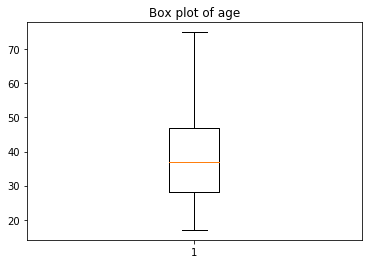

In [32]:
plt.boxplot(data['age'])
plt.title("Box plot of age")

Text(0.5, 1.0, 'Box plot of capital gain')

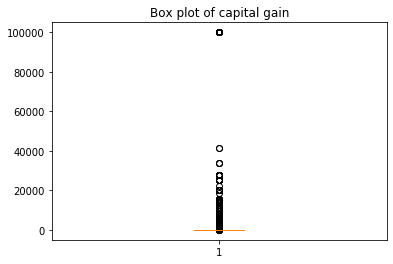

In [33]:
plt.boxplot(data['capital-gain'])
plt.title("Box plot of capital gain")

Text(0.5, 1.0, 'Box plot of hours per week')

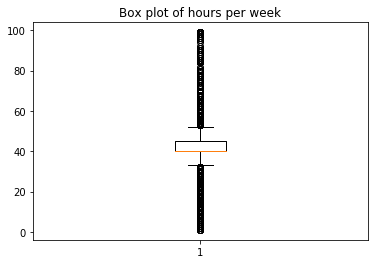

In [34]:
plt.boxplot(data['hours-per-week'])
plt.title("Box plot of hours per week")

In [35]:
q1=np.percentile(data['hours-per-week'],25,interpolation='midpoint')
q2=np.percentile(data['hours-per-week'],50,interpolation='midpoint')
q3=np.percentile(data['hours-per-week'],75,interpolation='midpoint')
print(q1)
print(q2)
print(q3)

40.0
40.0
45.0


In [36]:
iqr=q3-q1
l_lim=q1-1.5*iqr
u_lim=q3+1.5*iqr
print(l_lim)
print(u_lim)

32.5
52.5


In [37]:
outlier=[]
for x in data['hours-per-week']:
 if((x>u_lim)or(x<l_lim)):
        outlier.append(x)
outlier

[13,
 16,
 80,
 30,
 60,
 20,
 80,
 15,
 25,
 60,
 55,
 60,
 58,
 32,
 70,
 22,
 30,
 25,
 60,
 60,
 25,
 56,
 60,
 28,
 60,
 60,
 20,
 30,
 30,
 24,
 24,
 2,
 60,
 16,
 20,
 25,
 12,
 65,
 1,
 28,
 24,
 55,
 60,
 12,
 60,
 55,
 20,
 20,
 55,
 70,
 20,
 60,
 30,
 20,
 30,
 60,
 12,
 75,
 24,
 98,
 15,
 60,
 56,
 16,
 60,
 80,
 25,
 54,
 15,
 24,
 55,
 60,
 30,
 20,
 25,
 25,
 30,
 24,
 55,
 15,
 15,
 10,
 10,
 30,
 25,
 6,
 16,
 55,
 64,
 65,
 25,
 24,
 60,
 19,
 30,
 18,
 60,
 72,
 25,
 60,
 28,
 55,
 60,
 20,
 60,
 16,
 60,
 24,
 6,
 30,
 20,
 20,
 20,
 60,
 60,
 25,
 20,
 8,
 20,
 80,
 58,
 9,
 30,
 8,
 32,
 55,
 60,
 12,
 70,
 24,
 60,
 80,
 28,
 21,
 60,
 20,
 60,
 32,
 55,
 20,
 20,
 24,
 55,
 60,
 64,
 26,
 60,
 60,
 14,
 60,
 60,
 55,
 15,
 20,
 32,
 60,
 25,
 10,
 16,
 5,
 55,
 30,
 20,
 20,
 60,
 20,
 30,
 65,
 25,
 15,
 60,
 20,
 24,
 15,
 20,
 25,
 72,
 20,
 20,
 18,
 70,
 55,
 30,
 32,
 55,
 24,
 56,
 60,
 55,
 30,
 60,
 20,
 30,
 20,
 20,
 30,
 20,
 75,
 60,
 60,
 24,
 25

In [38]:
Ind1 = data['hours-per-week']<l_lim
location=data.loc[Ind1].index
data.drop(location,inplace=True)

In [39]:
Ind1 = data['hours-per-week']>u_lim
location=data.loc[Ind1].index
data.drop(location,inplace=True)

Text(0.5, 1.0, 'Box plot of hours-per-week')

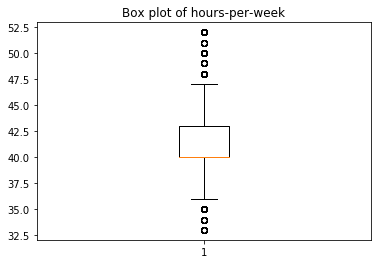

In [40]:
plt.boxplot(data['hours-per-week'])
plt.title("Box plot of hours-per-week")

# Data visualization

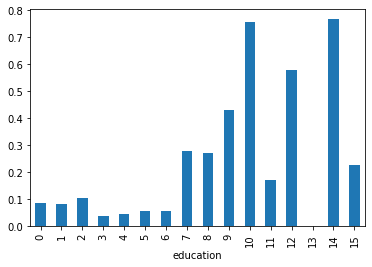

In [41]:
data.groupby('education').salary.mean().plot(kind='bar')

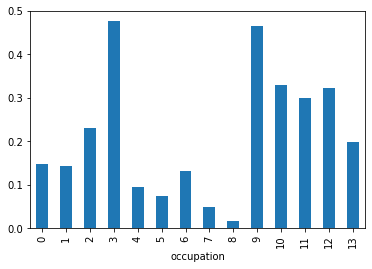

In [42]:
data.groupby('occupation').salary.mean().plot(kind='bar')

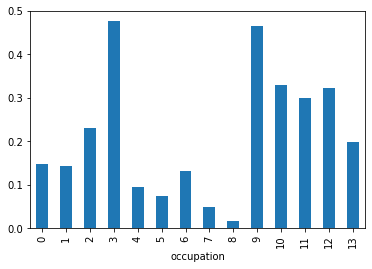

In [43]:
data.groupby('occupation').salary.mean().plot(kind='bar')

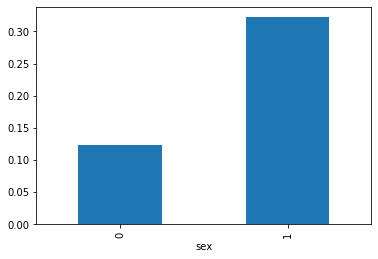

In [44]:
data.groupby('sex').salary.mean().plot(kind='bar')

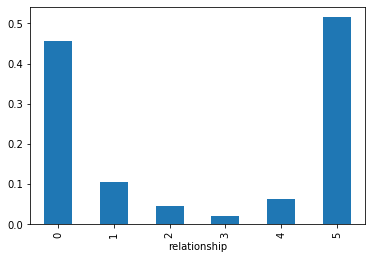

In [45]:
data.groupby('relationship').salary.mean().plot(kind='bar')

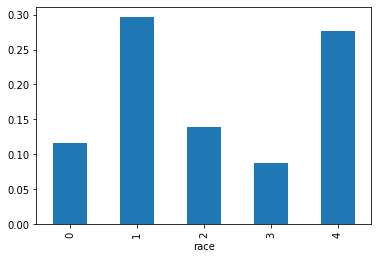

In [46]:
data.groupby('race').salary.mean().plot(kind='bar')

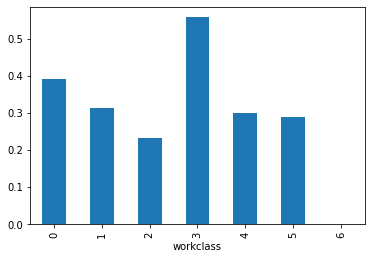

In [47]:
data.groupby('workclass').salary.mean().plot(kind='bar')

# Model selection

In [50]:
y=data['salary']

In [51]:
x=data.drop(['salary',],axis=1)

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

# Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

C:\Users\JUSTIN\Anaconda5\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [54]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,precision_score
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.8060510273199368
precision: 0.6995884773662552
recall: 0.4434782608695652
f1_score: 0.5428419372006386


# KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(70,90)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [57]:
acc_values

[0.829081056671935,
 0.8299841950778957,
 0.829081056671935,
 0.8302099796793858,
 0.829081056671935,
 0.8286294874689546,
 0.8299841950778957,
 0.8288552720704448,
 0.8288552720704448,
 0.8286294874689546,
 0.8299841950778957,
 0.8286294874689546,
 0.8288552720704448,
 0.8286294874689546,
 0.8288552720704448,
 0.8284037028674645,
 0.8297584104764055,
 0.8284037028674645,
 0.8288552720704448,
 0.8277263490629939]

Text(0, 0.5, 'accuracy')

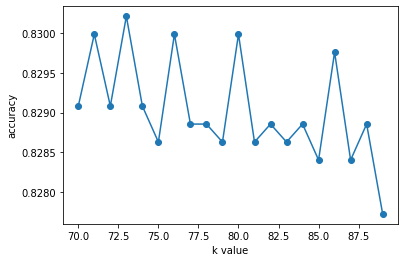

In [58]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [59]:
classifier=KNeighborsClassifier(n_neighbors=75, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)

In [60]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,precision_score
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.8286294874689546
precision: 0.7392900856793145
recall: 0.5252173913043479
f1_score: 0.614133197763091


# Decision tree

In [61]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [62]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.8096635809437797
precision: 0.6399270738377393
recall: 0.6104347826086957
f1_score: 0.6248331108144193


# Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier
Classifier = RandomForestClassifier(n_estimators = 50)
Classifier.fit(x_train,y_train)
y_predict = Classifier.predict(x_test)


In [64]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.8096635809437797
precision: 0.6399270738377393
recall: 0.6104347826086957
f1_score: 0.6248331108144193


# Gradient Boosting

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)

In [66]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.8593361932716189
precision: 0.7886089813800657
recall: 0.6260869565217392
f1_score: 0.6980126030053321


# Standard Scaling

In [67]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

### Logistics Regression

In [68]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

C:\Users\JUSTIN\Anaconda5\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [69]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.8175660419959359
precision: 0.7292225201072386
recall: 0.47304347826086957
f1_score: 0.5738396624472574


### KNN

In [70]:
classifier=KNeighborsClassifier(n_neighbors=75, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)

In [71]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.8184691804018966
precision: 0.7002314814814815
recall: 0.5260869565217391
f1_score: 0.6007944389275075


### Decision Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [73]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.7958907202528788
precision: 0.6173664122137404
recall: 0.5626086956521739
f1_score: 0.5887170154686079


### Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier
Classifier = RandomForestClassifier(n_estimators = 50)
Classifier.fit(x_train,y_train)
y_predict = Classifier.predict(x_test)

In [75]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.7958907202528788
precision: 0.6173664122137404
recall: 0.5626086956521739
f1_score: 0.5887170154686079


### Gradient boosting

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)

In [77]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.8405960713479341
precision: 0.7557603686635944
recall: 0.5704347826086956
f1_score: 0.6501486620416254


# Min-Max Scaling

In [78]:
y=data['salary']
x=data.drop(['salary',],axis=1)

In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [80]:
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))
x_train=min_max.fit_transform(x_train)
x_test=min_max.fit_transform(x_test)

### Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

C:\Users\JUSTIN\Anaconda5\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [82]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.8128245653646421
precision: 0.7213793103448276
recall: 0.4547826086956522
f1_score: 0.5578666666666667


### KNN

In [83]:
classifier=KNeighborsClassifier(n_neighbors=75, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)

In [84]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.82275908783021
precision: 0.6981541802388708
recall: 0.5591304347826087
f1_score: 0.6209560598744569


### Decision Tree

In [85]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [86]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.8128245653646421
precision: 0.6457765667574932
recall: 0.6182608695652174
f1_score: 0.6317192358951578


### Random Forest

In [87]:
from sklearn.ensemble import RandomForestClassifier
Classifier = RandomForestClassifier(n_estimators = 50)
Classifier.fit(x_train,y_train)
y_predict = Classifier.predict(x_test)

In [88]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.8128245653646421
precision: 0.6457765667574932
recall: 0.6182608695652174
f1_score: 0.6317192358951578


### Gradient Boosting

In [89]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)

In [90]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.8595619778731091
precision: 0.7888402625820569
recall: 0.6269565217391304
f1_score: 0.6986434108527131


# Normalization

In [91]:
y=data['salary']
x=data.drop(['salary',],axis=1)

In [92]:
x=preprocessing.normalize(x)

In [93]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

### Logistic Regression

In [94]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

C:\Users\JUSTIN\Anaconda5\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [95]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.7821178595619779
precision: 0.6390977443609023
recall: 0.3695652173913043
f1_score: 0.46831955922865015


### KNN

In [96]:
classifier=KNeighborsClassifier(n_neighbors=75, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)

In [97]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.8146308421765636
precision: 0.6871444823663254
recall: 0.5252173913043479
f1_score: 0.5953671759487433


### Decision tree

In [98]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [99]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.8175660419959359
precision: 0.6532258064516129
recall: 0.6339130434782608
f1_score: 0.6434245366284201


### Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier
Classifier = RandomForestClassifier(n_estimators = 50)
Classifier.fit(x_train,y_train)
y_predict = Classifier.predict(x_test)

In [101]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.8175660419959359
precision: 0.6532258064516129
recall: 0.6339130434782608
f1_score: 0.6434245366284201


### Gradient boosting

In [102]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)

In [103]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.8559494242492662
precision: 0.782560706401766
recall: 0.6165217391304347
f1_score: 0.6896887159533074


## Selected Model - Gradient Boosting Classifier

In [104]:
y=data['salary']
x=data.drop(['salary',],axis=1)

In [105]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

### Hyper parameter tuning

In [106]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


In [ ]:
parameters = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = parameters, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(x_train,y_train)
tuning.best_params_, tuning.best_score_

In [ ]:
parameter2 = {'max_depth':[2,3,4,5,6,7] }
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.01,n_estimators=1750, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = parameter2, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(x_train,y_train)
tuning.best_params_, tuning.best_score_

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1750,max_depth=5, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)

In [85]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,precision_score
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.8597274960911324
precision: 0.7436743674367436
recall: 0.6311858076563959
f1_score: 0.6828282828282828


Text(0, 0.5, 'accuracy')

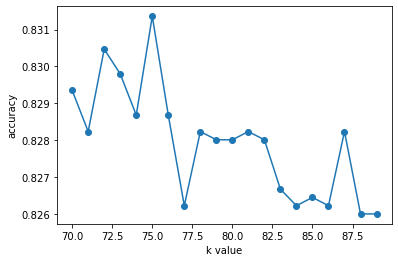

In [79]:
p#feeding the predict function with our test values in the format 
[['relationship','education','race','occupation','gender','marital','workclass']]
reg.predict([[1,7,3,7,0,2,0]])lt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [80]:
classifier=KNeighborsClassifier(n_neighbors=75, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)

In [81]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,precision_score
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.8313602859057404
precision: 0.7212885154061625
recall: 0.480859010270775
f1_score: 0.57703081232493


# Decision tree

In [82]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [83]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.800982800982801
precision: 0.5867052023121387
recall: 0.5686274509803921
f1_score: 0.5775248933143671


# Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier
Classifier = RandomForestClassifier(n_estimators = 50)
Classifier.fit(x_train,y_train)
y_predict = Classifier.predict(x_test)


In [85]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.800982800982801
precision: 0.5867052023121387
recall: 0.5686274509803921
f1_score: 0.5775248933143671


# Gradient Boosting

In [86]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)

In [87]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.856823765914675
precision: 0.757177033492823
recall: 0.5910364145658263
f1_score: 0.6638699528054537


# Standard Scaling

In [88]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

### Logistics Regression

In [90]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

In [91]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.8219790037971856
precision: 0.7154088050314465
recall: 0.42483660130718953
f1_score: 0.5330990041007616


### KNN

In [92]:
classifier=KNeighborsClassifier(n_neighbors=75, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)

In [93]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.8222023676569131
precision: 0.6797385620915033
recall: 0.48552754435107376
f1_score: 0.5664488017429193


### Decision Tree

In [94]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [95]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.7936117936117936
precision: 0.570877531340405
recall: 0.5527544351073763
f1_score: 0.5616698292220114


### Random Forest

In [96]:
from sklearn.ensemble import RandomForestClassifier
Classifier = RandomForestClassifier(n_estimators = 50)
Classifier.fit(x_train,y_train)
y_predict = Classifier.predict(x_test)

In [97]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.7936117936117936
precision: 0.570877531340405
recall: 0.5527544351073763
f1_score: 0.5616698292220114


### Gradient boosting

In [98]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)

In [99]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.8494527585436676
precision: 0.7354685646500593
recall: 0.5788982259570495
f1_score: 0.6478578892371996


# Min-Max Scaling

In [100]:
y=data['salary']
x=data.drop(['salary',],axis=1)

In [101]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [102]:
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))
x_train=min_max.fit_transform(x_train)
x_test=min_max.fit_transform(x_test)

### Logistic Regression

In [106]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

In [107]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.8181818181818182
precision: 0.7123966942148761
recall: 0.4024276377217554
f1_score: 0.5143198090692124


### KNN

In [108]:
classifier=KNeighborsClassifier(n_neighbors=75, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)

In [109]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.8190752736207282
precision: 0.6613102595797281
recall: 0.4995331465919701
f1_score: 0.5691489361702128


### Decision Tree

In [110]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [111]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.7985257985257985
precision: 0.5821185617103984
recall: 0.5592903828197946
f1_score: 0.5704761904761906


### Random Forest

In [112]:
from sklearn.ensemble import RandomForestClassifier
Classifier = RandomForestClassifier(n_estimators = 50)
Classifier.fit(x_train,y_train)
y_predict = Classifier.predict(x_test)

In [113]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.7985257985257985
precision: 0.5821185617103984
recall: 0.5592903828197946
f1_score: 0.5704761904761906


### Gradient Boosting

In [114]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)

In [115]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.8559303104757651
precision: 0.7603911980440098
recall: 0.580765639589169
f1_score: 0.6585494970884066


# Normalization

In [116]:
y=data['salary']
x=data.drop(['salary',],axis=1)

In [117]:
x=preprocessing.normalize(x)

In [118]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

### Logistic Regression

In [119]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

In [120]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.7920482465937011
precision: 0.6411290322580645
recall: 0.2969187675070028
f1_score: 0.4058710912571793


### KNN

In [121]:
classifier=KNeighborsClassifier(n_neighbors=75, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)

In [122]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.8210855483582756
precision: 0.6859504132231405
recall: 0.4649859943977591
f1_score: 0.5542570951585978


### Decision tree

In [123]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [124]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.8056734420370784
precision: 0.597478176527643
recall: 0.5751633986928104
f1_score: 0.5861084681255946


### Random Forest

In [125]:
from sklearn.ensemble import RandomForestClassifier
Classifier = RandomForestClassifier(n_estimators = 50)
Classifier.fit(x_train,y_train)
y_predict = Classifier.predict(x_test)

In [126]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.8056734420370784
precision: 0.597478176527643
recall: 0.5751633986928104
f1_score: 0.5861084681255946


### Gradient boosting

In [127]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)

In [128]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.8559303104757651
precision: 0.7603911980440098
recall: 0.580765639589169
f1_score: 0.6585494970884066


## Selected Model - Gradient Boosting Classifier

In [74]:
y=data['salary']
x=data.drop(['salary',],axis=1)

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

### Hyper parameter tuning

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


In [80]:
parameters = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = parameters, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(x_train,y_train)
tuning.best_params_, tuning.best_score_

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


({'learning_rate': 0.01, 'n_estimators': 1750}, 0.8583870202731052)

In [86]:
parameter2 = {'max_depth':[2,3,4,5,6,7] }
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.01,n_estimators=1750, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = parameter2, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(x_train,y_train)
tuning.best_params_, tuning.best_score_

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


({'max_depth': 5}, 0.8592248218660087)

In [83]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1750,max_depth=5, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)

In [85]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,precision_score
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.8597274960911324
precision: 0.7436743674367436
recall: 0.6311858076563959
f1_score: 0.6828282828282828


In [ ]:
#feeding the predict function with our test values in the format 
[['relationship','education','race','occupation','gender','marital','workclass']]
reg.predict([[1,7,3,7,0,2,0]])

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))